In [1]:
import pandas as pd
import os
from astroquery.vizier import Vizier
from astropy.coordinates import SkyCoord
from astropy import units as u 
from astroquery.xmatch import XMatch
import seaborn as sns
import matplotlib.pyplot as plt

os.chdir('C:\\Users\\gamak\\Documents\\Papers\\Stars\\')

Could not import regions, which is required for some of the functionalities of this module.


In [2]:
tab = pd.read_csv('gaia_xstars_pm_r98_200pc_lkh10_woutdup.gzip')

In [23]:
[*tab.columns]

['solution_id',
 'designation',
 'source_id',
 'random_index',
 'ref_epoch',
 'ra',
 'ra_error',
 'dec',
 'dec_error',
 'parallax',
 'parallax_error',
 'parallax_over_error',
 'pm',
 'pmra',
 'pmra_error',
 'pmdec',
 'pmdec_error',
 'ra_dec_corr',
 'ra_parallax_corr',
 'ra_pmra_corr',
 'ra_pmdec_corr',
 'dec_parallax_corr',
 'dec_pmra_corr',
 'dec_pmdec_corr',
 'parallax_pmra_corr',
 'parallax_pmdec_corr',
 'pmra_pmdec_corr',
 'astrometric_n_obs_al',
 'astrometric_n_obs_ac',
 'astrometric_n_good_obs_al',
 'astrometric_n_bad_obs_al',
 'astrometric_gof_al',
 'astrometric_chi2_al',
 'astrometric_excess_noise',
 'astrometric_excess_noise_sig',
 'astrometric_params_solved',
 'astrometric_primary_flag',
 'nu_eff_used_in_astrometry',
 'pseudocolour',
 'pseudocolour_error',
 'ra_pseudocolour_corr',
 'dec_pseudocolour_corr',
 'parallax_pseudocolour_corr',
 'pmra_pseudocolour_corr',
 'pmdec_pseudocolour_corr',
 'astrometric_matched_transits',
 'visibility_periods_used',
 'astrometric_sigma5d_max

In [29]:
col=['ra_2','dec_2','source_id']
pos_list = tab[col]
pos_list.to_csv('pos_list_SDSS.csv',index=False)

In [6]:
tab_SDSS = XMatch.query(cat1=open('pos_list_SDSS.csv'), cat2='vizier:V/139/sdss9',max_distance=2*u.arcsec, colRA1='ra_2', colDec1='dec_2')

In [20]:
tab_PAN = XMatch.query(cat1=open('pos_list_SDSS.csv'), cat2='vizier:II/349/ps1',max_distance=2*u.arcsec, colRA1='ra_2', colDec1='dec_2')

In [83]:
PAN = tab_PAN.to_pandas()
PAN.source_id = pd.to_numeric(PAN['source_id'])
col_PAN = ['source_id','MG','gmag','rmag','imag','zmag']
xPAN = PAN.merge(tab, 'inner', 'source_id')[col_PAN]
xPAN['g_r'] = xPAN.gmag-xPAN.rmag
xPAN['g_z'] = xPAN.gmag-xPAN.zmag

In [84]:
SDSS = tab_SDSS.to_pandas()
SDSS.source_id = pd.to_numeric(SDSS['source_id'])
col_SDSS = ['source_id','MG','gmag','rmag','imag','zmag']
xSDSS = SDSS.merge(tab, 'inner', 'source_id')[col_SDSS]
xSDSS['g_r'] = xSDSS.gmag-xSDSS.rmag
xSDSS['g_z'] = xSDSS.gmag-xSDSS.zmag
xSDSS = xSDSS.where(xSDSS.gmag < 22).dropna()

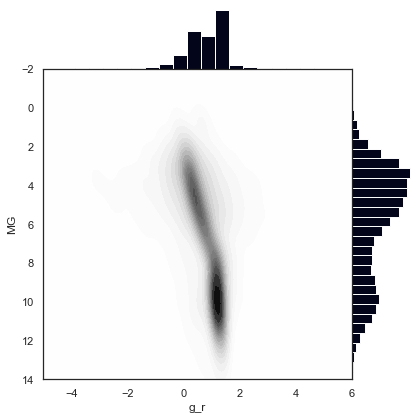

In [22]:
import seaborn as sns
sns.set_theme(style="white")

g = sns.JointGrid(data=xPAN, x="g_r", y="MG", space=0, xlim=(-5,6), ylim=(14,-2)) #
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=0.5)

In [106]:
xSDSS.to_csv('.\\NewIter\\xSDSS9.csv')

In [90]:
xPAN.to_csv('./NewIter/xPAN.csv')

In [73]:
xPANdr2 = pd.read_csv('./NewIter/xPANdr2.csv')

In [74]:
xPANdr2['g_r']=xPANdr2.gMeanPSFMag - xPANdr2.rMeanPSFMag

In [75]:
xPANdr2n = xPANdr2.where(xPANdr2.gMeanPSFMag >-5).dropna()

In [76]:
xPANdr2n = xPANdr2n.where(xPANdr2n.rMeanPSFMag >-5).dropna()

In [77]:
xPANdr2n['g_r'] = xPANdr2n.gMeanPSFMag - xPANdr2n.rMeanPSFMag

In [80]:
xPANdr2n = xPANdr2n.drop_duplicates('source_id', ignore_index=True)

In [87]:
col_PAN = ['source_id','MG','gMeanPSFMag','rMeanPSFMag','iMeanPSFMag','zMeanPSFMag', 'g_r']
xPAN_dr2 = xPANdr2n.merge(tab, 'inner', 'source_id')[col_PAN]

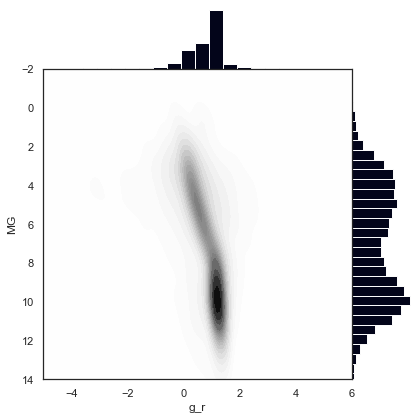

In [88]:
g = sns.JointGrid(data=xPAN_dr2, x="g_r", y="MG", space=0, xlim=(-5,6), ylim=(14,-2)) #
g.plot_joint(sns.kdeplot,
             fill=True,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=0.5)

In [91]:
xPAN_dr2.to_csv('./NewIter/xPANdr2.csv')

In [118]:
cross_SDSS_PANdr2 = xSDSS.merge(xPAN_dr2, 'inner','source_id')

Text(0, 0.5, 'g PAN')

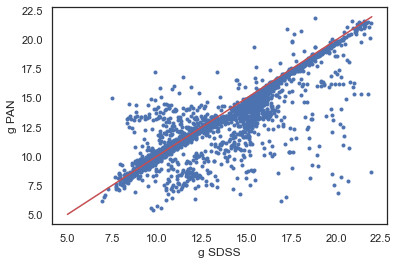

In [117]:
plt.plot(cross_SDSS_PANdr2.gmag, cross_SDSS_PANdr2.gMeanPSFMag, '.b')
plt.plot(range(5,23),range(5,23),'-r')
plt.xlabel('g SDSS')
plt.ylabel('g PAN')

In [119]:
cross_SDSS_PANdr1 = xSDSS.merge(xPAN, 'inner','source_id')

In [46]:
plt.plot(cross_SDSS_PANdr2.gmag_x, cross_SDSS_PANdr1.gmag_y, '.b')
plt.plot(range(5,23),range(5,23),'-r')
plt.xlabel('g SDSS')
plt.ylabel('g PAN')

NameError: name 'cross_SDSS_PANdr2' is not defined

In [2]:
xSDSS = pd.read_csv('./NewIter/xSDSS9.csv')

In [3]:
xSDSS['Teff'] = 1.09e4/(xSDSS.g_r+1.47)

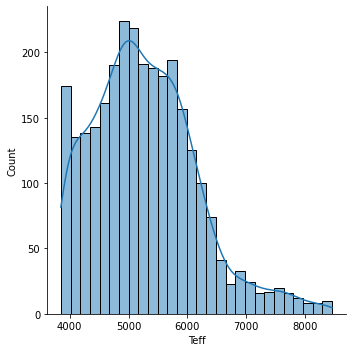

In [45]:
sns.displot(xSDSS_T, x="Teff", kde=True, )

In [5]:
xSDSS['r_i'] = xSDSS.rmag - xSDSS.imag

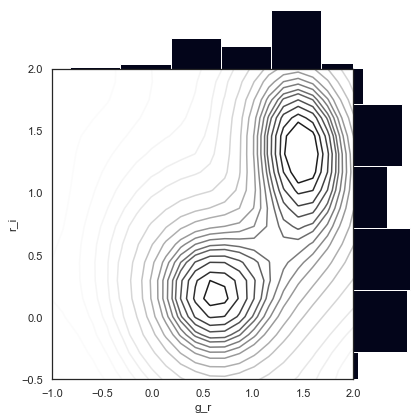

In [145]:
g = sns.JointGrid(data=xSDSS, x="g_r", y="r_i", space=0, xlim=(-1,2), ylim=(-.5,2)) #
g.plot_joint(sns.kdeplot,
             thresh=0, levels=20, cmap="gray_r") #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, binwidth=0.1)

In [20]:
xSDSS_T = xSDSS.where(xSDSS.Teff > 3850).dropna() #g-r > -.5 for PANSTARRS

In [21]:
xSDSS_T = xSDSS_T.where(xSDSS_T.Teff < 8500).dropna()

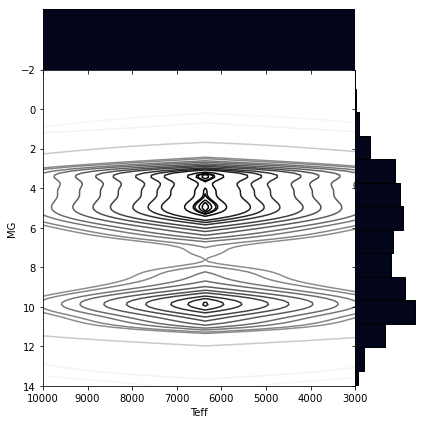

In [49]:
g = sns.JointGrid(data=xSDSS, x="Teff", y="MG", space=0,  xlim=(10000,3000), ylim=(14,-2)) # 
g.plot_joint(sns.kdeplot,
             thresh=0, levels=20, cmap="gray_r", bw_adjust = 0.4) #,  clip=((-.1, 4.1), (14, -2))
g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=16)

<AxesSubplot:>

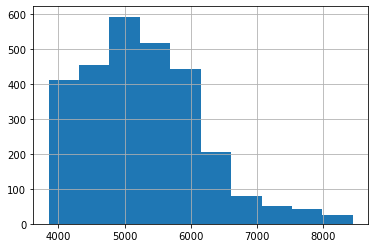

In [25]:
xSDSS_T.Teff.hist()